# Validation of connectivity

This notebook forms the basis of the connectivity validation.

## Start ipcluster to run in parallel
To run in parallel you need to first start ipcluster. On linux you type the following into the terminal, note that you should be in the same directory as this notebook is in.

```
if [[ -d "$HOME/BasalGangliaData/data" ]]; then
    export SNUDDA_DATA="$HOME/BasalGangliaData/data"
    echo "Setting SNUDDA_DATA to $SNUDDA_DATA"
else
    echo "SNUDDA_DATA environment variable not changed (may be empty): $SNUDDA_DATA"
fi

export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=default
ipcluster start
```

These commands are in ```start_ipcluster.sh``` in the examples/notebook directory. After starting ipcluster give it a few seconds to get fully up and running before proceeding with the rest of the commands in this notebook. The first if statement checks if you have ```BasalGangliaData```, if it does exist then ```SNUDDA_DATA``` is set.

If you restart the run you might need to do:

```
ipcluster stop
ipcluster start
```

For instructions how to install and activate ipyparallel for your notebook see https://github.com/ipython/ipyparallel

In [1]:
import os
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

In [2]:
# If the BasalGangliaData directory exists, then use that for our data
snudda_data = os.path.join("..","..","..","..","..", "BasalGangliaData", "data")
if os.path.exists(snudda_data):
    os.environ["SNUDDA_DATA"] = snudda_data
    print(f"Setting SNUDDA_DATA to {snudda_data}")
else:
    print(f"SNUDDA_DATA environment variable not changed (may be empty)")

Setting SNUDDA_DATA to ../../../../../BasalGangliaData/data


In [3]:
import os

network_path = os.path.join("networks/connectivity_validation")

from snudda import SnuddaInit
struct_def = {"Striatum": 5000 }

si = SnuddaInit(network_path=network_path, struct_def=struct_def, random_seed=1234, snudda_data=snudda_data)

Adding Striatum with 5000 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.00

In [4]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../../BasalGangliaData/data from networks/connectivity_validation/network-config.json


In [5]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../../BasalGangliaData/data from networks/connectivity_validation/network-config.json
importing SnuddaDetect from snudda.detect.detect on engine(s)
importing ProjectionDetection from snudda.detect.projection_detection on engine(s)
Suppressing printouts for hyper voxels that complete in < 100 seconds.
HyperID 185 completed - 7416472 synapses found (130.4 s)
HyperID 128 completed - 12476108 synapses found (191.5 s)
HyperID 129 completed - 17837799 synapses found (261.8 s)


In [6]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

importing SnuddaPrune from snudda.detect.prune on engine(s)
prune_synapses_parallel (2863447/54228190 synapses, 5.3% kept): 121.5s
prune_synapses_parallel (227/889 gapJunctions, 25.5% kept): 0.1s


## Validating the connection probability

Next we read in the ```network-synapses.hdf5``` file and validates that the connection probabilities are correct.

In [7]:
import os
from snudda.analyse.analyse import SnuddaAnalyse

network_file = os.path.join(network_path,"network-synapses.hdf5")
dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Creating figures directory networks/connectivity_validation/figures
Loading 5000 neurons with 2863447 synapses and 227 gap junctions
Number of neurons: 5000
Synapse row 0 - 0.0 % time: 0.07936887198593467 seconds
Synapse row 1000000 - 34.9229442696163 % time: 1.1025505040306598 seconds
Synapse row 1931723 - 67.46145467333602 % time: 2.0538707099622115 seconds
Created connection matrix 2.9277438409626484 seconds
GJ row : 0 - 0.0 %  time : 0.002042989945039153 seconds
Created gap junction connection matrix 0.002762068994343281 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 5000/5000
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 2863447, at 0
n_synapses = 2863447, at 1000000
n_synapses = 2863447, at 2000000
Created distance histogram (optimised) in 2.806498195976019 seconds
Saving cache to networks/connectivity_validation/network-synapses.hdf

Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [1883796.]
Rejected (too large z-depth): 3975024
P(d<5e-05) = 0.25522089383754937
P(d<0.0001) = 0.20159222213488445


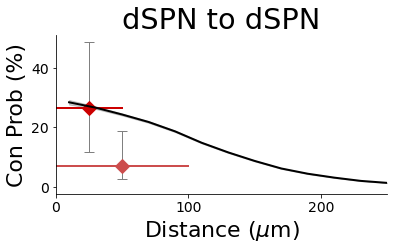

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf


({5e-05: 0.25522089383754937, 0.0001: 0.20159222213488445},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf')

In [8]:
# Planert et al 2010, Taverna et al 2008
sa.plot_connection_probability("dSPN", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[5 / 19.0, 3 / 43.0],
                               exp_data_detailed=[(5, 19), (3, 43)],
                               y_max=y_max_H)

Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [1879952.]
Rejected (too large z-depth): 3981289
P(d<5e-05) = 0.0578976288093326
P(d<0.0001) = 0.04632682063825056


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


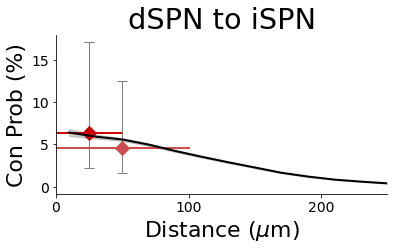

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf


({5e-05: 0.0578976288093326, 0.0001: 0.04632682063825056},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf')

In [9]:
sa.plot_connection_probability("dSPN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[3 / 47.0, 3 / 66.0],
                               exp_data_detailed=[(3, 47), (3, 66)],
                               y_max=y_max_H)

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [1879952.]
Rejected (too large z-depth): 3981289
P(d<5e-05) = 0.2779153810389281
P(d<0.0001) = 0.2128186660737246


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


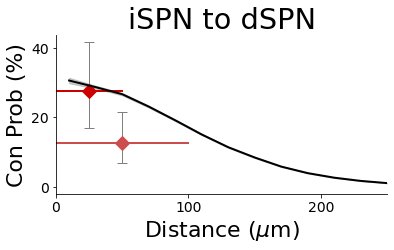

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf


({5e-05: 0.2779153810389281, 0.0001: 0.2128186660737246},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf')

In [10]:
sa.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)],
                                y_max=y_max_H)

Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [1874776.]
Rejected (too large z-depth): 3984044
P(d<5e-05) = 0.3490234178699454
P(d<0.0001) = 0.2847817119614746


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


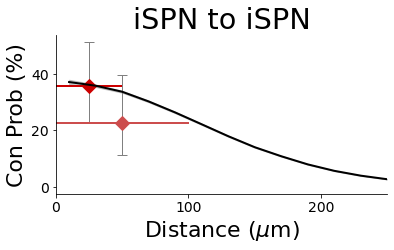

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf


({5e-05: 0.3490234178699454, 0.0001: 0.2847817119614746},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf')

In [11]:
sa.plot_connection_probability("iSPN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[14 / 39.0, 7 / 31.0],
                               exp_data_detailed=[(14, 39), (7, 31)],
                               y_max=y_max_H)

Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 66/66
Counting connections
Requested: 10000000.0 calculated [1474.]
Rejected (too large z-depth): 2816
P(d<0.00025) = 0.1645021645021645


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


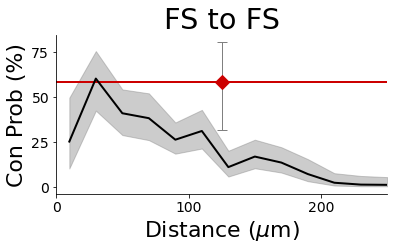

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-FS-synapses-2D-dist.pdf


({0.00025: 0.1645021645021645},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-FS-synapses-2D-dist.pdf')

In [12]:
#  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
# FS->FS synapses weaker, 1.1 +/- 1.5nS
sa.plot_connection_probability("FS", "FS",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[7 / 12.0],
                               exp_data_detailed=[(7, 12)])

The next cell is FS-FS gap junction connectivity. This data is from young or juvenlie mice, and adult mice might have lower connectivity (8%?). I will update the tuning for adults soon.

Plotting connection probability FS to FS (gapjunctions)
Centering in None : Keeping 66/66
Counting connections
Requested: 10000000.0 calculated [1474.]
Rejected (too large z-depth): 2816
P(d<0.0002) = 0.054945054945054944
P(d<0.00025) = 0.04329004329004329
P(d<0.00025) = 0.04329004329004329


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


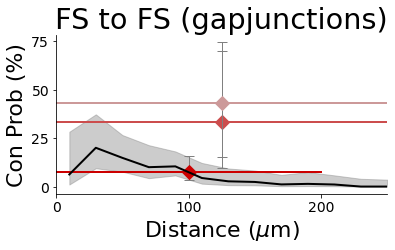

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-2D-dist.pdf


({0.0002: 0.054945054945054944, 0.00025: 0.04329004329004329},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-2D-dist.pdf')

In [13]:
# Koos & Tepper 1999, 2/6
# McKeon, ... , Matheur 2022, 6/78 -- coupling 0.0006 to 0.0789

sa.plot_connection_probability("FS", "FS",
                               dist_3d=dist3D,
                               connection_type="gapjunctions",
                               exp_max_dist=[200e-6, 250e-6, 250e-6],
                               exp_data=[6 / 78.0, 2 / 6.0, 3 / 7.0],
                               exp_data_detailed=[(6, 78), (2, 6), (3, 7)], )

Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [52713.]
Rejected (too large z-depth): 107073
P(d<0.0001) = 0.6158654692727593
P(d<0.00015) = 0.5007604348560807
P(d<0.00025) = 0.29673928520575255


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


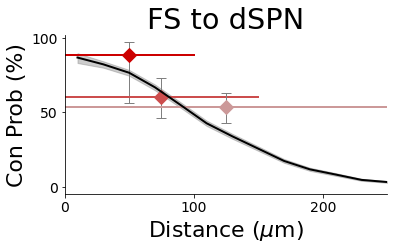

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-dSPN-synapses-2D-dist.pdf


({0.0001: 0.6158654692727593,
  0.00015: 0.5007604348560807,
  0.00025: 0.29673928520575255},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-dSPN-synapses-2D-dist.pdf')

In [14]:
sa.plot_connection_probability("FS", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[100e-6, 150e-6, 250e-6],
                               exp_data=[8 / 9.0, 29 / 48.0, 48 / 90.0],
                               exp_data_detailed=[(8, 9), (29, 48), (48, 90)],
                               y_max=None)

Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [52639.]
Rejected (too large z-depth): 107147
P(d<0.0001) = 0.44873140857392824
P(d<0.00015) = 0.35425609008305925
P(d<0.00025) = 0.20491526378019256


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


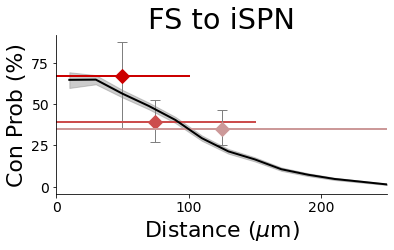

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-iSPN-synapses-2D-dist.pdf


({0.0001: 0.44873140857392824,
  0.00015: 0.35425609008305925,
  0.00025: 0.20491526378019256},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-iSPN-synapses-2D-dist.pdf')

In [15]:
sa.plot_connection_probability("FS", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[100e-6, 150e-6, 250e-6],
                               exp_data=[6 / 9.0, 21 / 54.0, 27 / 77.0],
                               exp_data_detailed=[(6, 9), (21, 54), (27, 77)],
                               y_max=None)

Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [28636.]
Rejected (too large z-depth): 58520
P(d<0.00025) = 0.0


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


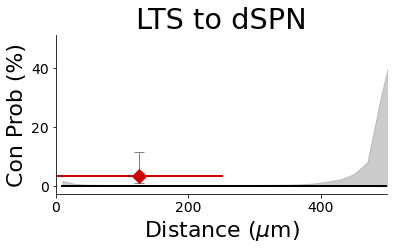

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf


({0.00025: 0.0},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf')

In [16]:
# 3/21 LTS->MS, Basal Ganglia book --- distance??
# Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
# but 2/60 when patching blind
sa.plot_connection_probability("LTS", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2 / 60.0],
                               exp_data_detailed=[(2, 60)],
                               x_max=500)

Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [28497.]
Rejected (too large z-depth): 58659
P(d<0.00025) = 0.0


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


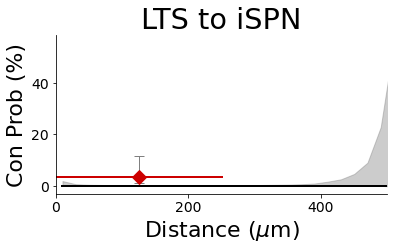

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf


({0.00025: 0.0},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf')

In [17]:
sa.plot_connection_probability("LTS", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2 / 60.0],
                               exp_data_detailed=[(2, 60)],
                               x_max=500)

Plotting connection probability FS to LTS (synapses)
Centering in None : Keeping 36/36
Counting connections
Requested: 10000000.0 calculated [782.]
Rejected (too large z-depth): 1594
P(d<0.00025) = 0.05950095969289827


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


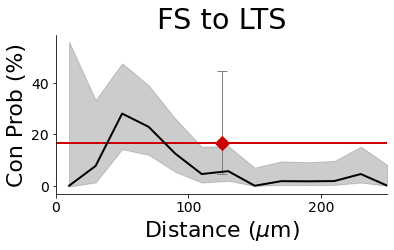

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-LTS-synapses-2D-dist.pdf


({0.00025: 0.05950095969289827},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-LTS-synapses-2D-dist.pdf')

In [18]:
# Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
sa.plot_connection_probability("FS", "LTS",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2.0 / 12],
                               exp_data_detailed=[(2, 12)])

The Chin to dSPN/iSPN should be run with larger networks.

Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [45593.]
Rejected (too large z-depth): 89983
P(d<0.00025) = 0.0


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


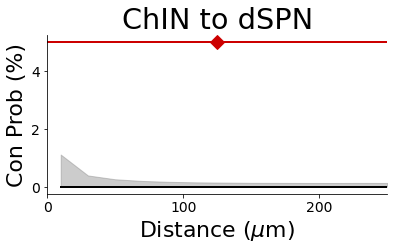

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf


({0.00025: 0.0},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf')

In [19]:
# Janicova 2015?? --- distance?
sa.plot_connection_probability("ChIN", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[0.05])

Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 2421/2421
Counting connections
Requested: 10000000.0 calculated [45472.]
Rejected (too large z-depth): 90104
P(d<0.00025) = 0.0


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


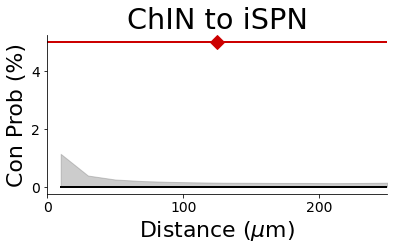

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf


({0.00025: 0.0},
 'networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf')

In [20]:
sa.plot_connection_probability("ChIN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[0.05])